In [1]:
#import necessary library
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.image as mpimg
import os


In [2]:
#load dataset files
train = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')

In [3]:
#show train file
train.head()

,id,label
0,1,9
1,2,0
2,3,0
3,4,3
4,5,0


In [4]:
#show test file
test.head()

,id
0,60001
1,60002
2,60003
3,60004
4,60005


In [6]:
#create feature (x)and target(y) variable 
x_label=[]
y_label=[]
base_dir='train'
for i,j in enumerate(os.listdir(base_dir)):
    x_label.append(mpimg.imread(base_dir+"/"+str(i+1)+".png"))

In [7]:
for i in train['label']:
    y_label.append(i)

In [8]:
#display first 10 target variable 
y_label[:10]

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]

9
(28, 28, 4)


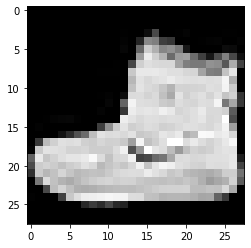

In [9]:
#show first image and its label
plt.imshow(x_label[0])
print(y_label[0])
print(np.array(x_label[0]).shape)

In [10]:
#defining deep learning model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 4)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
#compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
#summary of layer in model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        1184      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

In [12]:
#creating callback function
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9995):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True
callbacks = myCallback() 

In [13]:
#number of target variabke
print(len(np.array(y_label)))
#number of feature variable
print(len(np.array(x_label)))

60000
60000


In [14]:
print(len(np.array(y_label)))
#shape of taget variable
print(np.array(y_label).shape)
#shape of feature variable
print(np.array(x_label).shape)

60000
(60000,)
(60000, 28, 28, 4)


In [15]:
#training model
history = model.fit(np.array(x_label),np.array(y_label),epochs=15,verbose=2,callbacks=[callbacks])

Epoch 1/15
1875/1875 - 28s - loss: 0.6934 - accuracy: 0.7427
Epoch 2/15
1875/1875 - 26s - loss: 0.4858 - accuracy: 0.8207
Epoch 3/15
1875/1875 - 27s - loss: 0.4351 - accuracy: 0.8380
Epoch 4/15
1875/1875 - 26s - loss: 0.4114 - accuracy: 0.8478
Epoch 5/15
1875/1875 - 28s - loss: 0.3918 - accuracy: 0.8543
Epoch 6/15
1875/1875 - 29s - loss: 0.3822 - accuracy: 0.8567
Epoch 7/15
1875/1875 - 30s - loss: 0.3756 - accuracy: 0.8595
Epoch 8/15
1875/1875 - 30s - loss: 0.3664 - accuracy: 0.8634
Epoch 9/15
1875/1875 - 29s - loss: 0.3622 - accuracy: 0.8645
Epoch 10/15
1875/1875 - 29s - loss: 0.3542 - accuracy: 0.8680
Epoch 11/15
1875/1875 - 29s - loss: 0.3536 - accuracy: 0.8687
Epoch 12/15
1875/1875 - 31s - loss: 0.3515 - accuracy: 0.8687
Epoch 13/15
1875/1875 - 32s - loss: 0.3479 - accuracy: 0.8705
Epoch 14/15
1875/1875 - 32s - loss: 0.3437 - accuracy: 0.8723
Epoch 15/15
1875/1875 - 36s - loss: 0.3428 - accuracy: 0.8722


In [21]:
#training accuracy - 87.22% and training loss 0.3428

In [16]:
#saving model
model.save("Trained-Model/Apperel_predict.h5")

In [17]:
#testing model
on test imagetest_image=[]
base_dir='test'
for j in sample_submission['id']:
    test_image.append(mpimg.imread(base_dir+"/"+str(j)+".png"))  

In [18]:
answer=model.predict(np.array(test_image))

In [19]:
print(np.array(test_image).shape)
print(np.array(answer).shape)

(10000, 28, 28, 4)
(10000, 10)


5


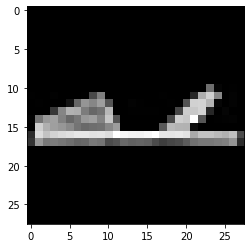

In [20]:
import matplotlib.pyplot as plt
plt.imshow(test_image[111])
print(list(answer[111]).index(max(answer[111])))